# Importing necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
myntra = pd.read_csv('myntra202305041052.csv')

# Understanding the dataset.

In [55]:
print(f'Total number of Columns : {myntra.shape[0]}')
print(f'Total number of Rows : {myntra.shape[1]}')

Total number of Columns : 1060213
Total number of Rows : 10


In [5]:
myntra.columns

Index(['id', 'name', 'img', 'asin', 'price', 'mrp', 'rating', 'ratingTotal',
       'discount', 'seller', 'purl'],
      dtype='object')

In [6]:
myntra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1060213 non-null  int64  
 1   name         1060213 non-null  object 
 2   img          1060213 non-null  object 
 3   asin         1060213 non-null  object 
 4   price        1060213 non-null  float64
 5   mrp          1060213 non-null  float64
 6   rating       1060213 non-null  float64
 7   ratingTotal  1060213 non-null  int64  
 8   discount     1060213 non-null  int64  
 9   seller       1060213 non-null  object 
 10  purl         1060213 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.0+ MB


In [7]:
myntra.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


In [56]:
myntra.describe()

,id,price,mrp,rating,ratingTotal,discount
count,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06
mean,5.301070e+05,1.536235e+03,2.668379e+03,1.060150e+00,4.189618e+01,1.496420e+02
std,3.060573e+05,3.051140e+03,3.877900e+03,1.829632e+00,7.476645e+02,5.648781e+02
min,1.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.650540e+05,4.990000e+02,9.990000e+02,0.000000e+00,0.000000e+00,1.500000e+01
50%,5.301070e+05,8.110000e+02,1.780000e+03,0.000000e+00,0.000000e+00,5.000000e+01
75%,7.951600e+05,1.497000e+03,2.999000e+03,2.800000e+00,3.000000e+00,6.800000e+01
max,1.060213e+06,2.575000e+05,2.575000e+05,5.000000e+00,7.640000e+04,1.999600e+04


# Cleaning Dataset.

# Droping columns which are not required in our analysis.

In [8]:
myntra = myntra.drop(['img','asin'],axis=1)
myntra.sample()

,id,name,price,mrp,rating,ratingTotal,discount,seller,purl
668042,668043,Unisex Round Sunglasses,379.0,1999.0,0.0,0,81,GARTH,https://www.myntra.com/sunglasses/garth/garth-...


# Checking for missing values if any.  

In [9]:
myntra.isnull().sum()

id             0
name           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
purl           0
dtype: int64

It seems there are no null values.

# Checking for duplicated columns.

In [68]:
myntra.duplicated().sum()

0

There are no duplicate rows.

# Number of unique values in each column.

In [10]:
myntra.nunique()

id             1060213
name            217738
price            12114
mrp              12479
rating              42
ratingTotal       1294
discount          3346
seller            5496
purl            823254
dtype: int64

# EDA

In [12]:
name_count = myntra['name'].value_counts()
name_count

Men Polo Collar T-shirt                    5644
Gold-Plated Jewellery Set                  5485
Men Typography Printed T-shirt             4326
Printed Round Neck T-shirt                 4055
Men Slim Fit Jeans                         4046
                                           ... 
Empire Tiered Mini Dress                      1
Women Slim Jogger Fit Jeans                   1
Mini Dress With Lace Inserts                  1
Abstract Waistline Dress                      1
Men Checked Slim Fit Cotton Track Pants       1
Name: name, Length: 217738, dtype: int64

Top 5 name counts.

In [13]:
top_5_names = name_count.head()
top_5_names

Men Polo Collar T-shirt           5644
Gold-Plated Jewellery Set         5485
Men Typography Printed T-shirt    4326
Printed Round Neck T-shirt        4055
Men Slim Fit Jeans                4046
Name: name, dtype: int64

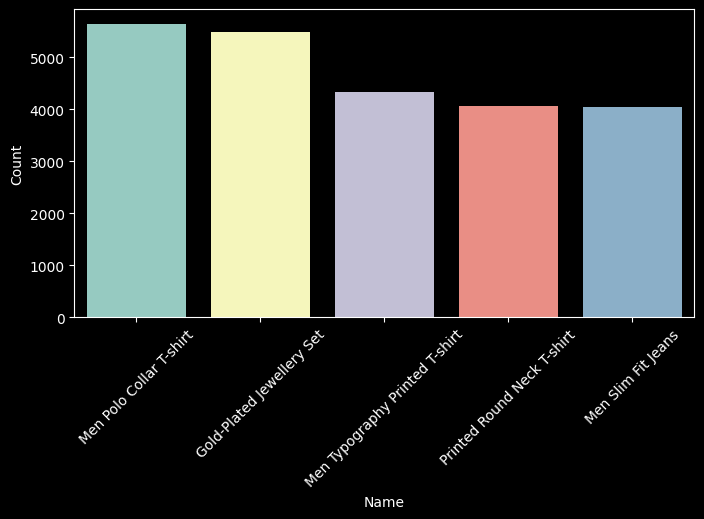

In [21]:
# Creating a bar plot
plt.style.use('dark_background')
plt.figure(figsize=(8,4))
sns.barplot(x=top_5_names.index,y=top_5_names.values)
plt.xticks(rotation=45)
plt.xlabel('Name')
plt.ylabel('Count')
plt.show()

# Total number of sellers.

In [49]:
sellers = myntra['seller'].nunique()
print(f'Total Number of Sellers : {sellers}')

Total Number of Sellers : 5496


In [54]:
sellername = list(myntra['seller'].unique())
sellername

['Difference of Opinion',
 'Roadster',
 'DILLINGER',
 'Huetrap',
 'HELLCAT',
 'HRX by Hrithik Roshan',
 'VEIRDO',
 'Louis Philippe Sport',
 'Moda Rapido',
 'Urbano Fashion',
 'U.S. Polo Assn.',
 'Puma',
 'HERE&NOW',
 'Nautica',
 'H&M',
 'Bonkers Corner',
 'Kook N Keech',
 'BRINNS',
 'Wool Trees',
 'Okane',
 'WEAVETECH IMPEX',
 'Sztori',
 'Styli',
 'Urban Revivo',
 'Kanvin',
 'ELLIS',
 'RAASSIO',
 'GUTI',
 'TAG 7',
 'Mast & Harbour',
 'Sweet Dreams',
 'DressBerry',
 'SHEETAL Associates',
 'SASSAFRAS',
 'LYRA',
 'Jinfo',
 'NEUDIS',
 'Juniper',
 'ADIDAS',
 'SUMAVI-FASHION',
 'BoStreet',
 'Frempy',
 'T-SHIRT TRUCK',
 'Nimble',
 'Disrupt',
 'MODWEE',
 'urSense',
 'Vero Moda',
 'GRIIHAM',
 'RESIST EYEWEAR',
 'Aazeen',
 'MYKI',
 'Hair Flare',
 'MAGNEQ',
 'MANSIYAORANGE',
 'CRUSSET',
 'FRENCH ESSENCE',
 'PALMONAS',
 'Silvermerc Designs',
 'ROFARWORD',
 'Peora',
 'SOHI',
 'Samridhi DC',
 'Sukkhi',
 'Metro',
 'Vita Bella',
 'RUHI COLLECTION',
 '20Dresses',
 'Anouk',
 'VIEN',
 'Jewelz',
 'MCaffei

# Getting type of items from url.

In [15]:
def item(url):
    return url.split('/')[3]

myntra['items'] = myntra['purl'].apply(item)
myntra

,id,name,price,mrp,rating,ratingTotal,discount,seller,purl,items
0,1,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...,tshirts
1,2,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts
2,3,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...,tshirts
3,4,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...,tshirts
4,5,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts
...,...,...,...,...,...,...,...,...,...,...
1060208,1060209,Men Slim Tapered Fit Jeans,1199.0,2399.0,4.3,44,50,Flying Machine,https://www.myntra.com/jeans/flying-machine/fl...,jeans
1060209,1060210,Men Skinny Fit Jeans,574.0,2299.0,3.8,34,75,Mast & Harbour,https://www.myntra.com/jeans/mast--harbour/mas...,jeans
1060210,1060211,Men Printed Shorts,799.0,1599.0,3.9,8,50,WROGN ACTIVE,https://www.myntra.com/shorts/wrogn-active/wro...,shorts
1060211,1060212,Men Skinny Fit Jeans,1199.0,1999.0,3.8,592,40,Roadster,https://www.myntra.com/jeans/roadster/roadster...,jeans


# Top 10 items having maximum average market price. 

In [23]:
top_10_max = myntra.groupby('items')['mrp'].mean().sort_values(ascending=False).head(10).reset_index()
top_10_max = round(top_10_max,2)
top_10_max

,items,mrp
0,bracelet-diamond,42054.00
1,necklace-and-chains-diamond,32827.66
2,earrings-diamond,31796.26
3,necklace-gold,31461.09
4,earrings-gold,28759.60
5,ring-diamond,27770.00
6,pendant-diamond,26827.10
7,ring-gold,26645.93
8,bangle-gold,23706.71
9,gold-coin,21778.57


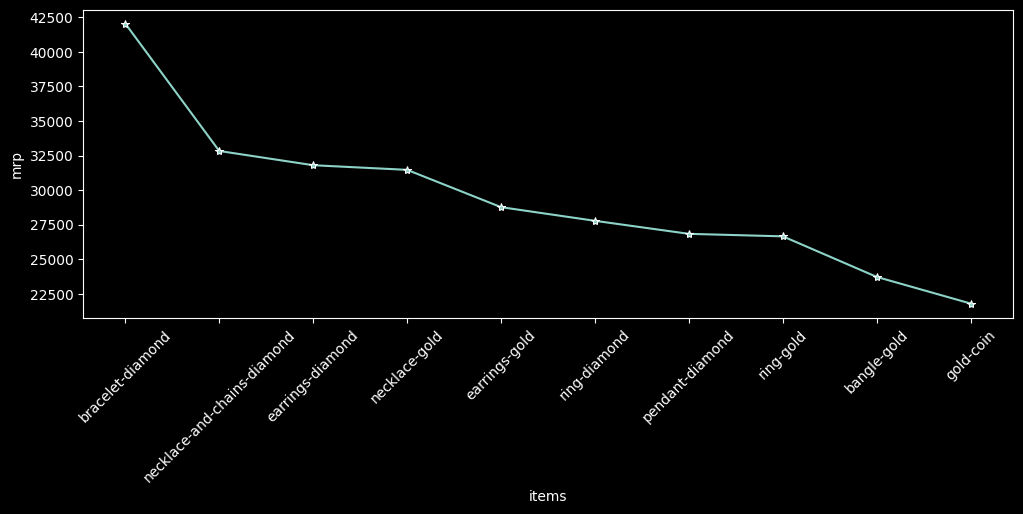

In [24]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
sns.lineplot(x = 'items',y='mrp',data=top_10_max,marker='*')
plt.show()

# Top 10 item types with maximum discount.

In [19]:
max_discount = myntra.groupby('items')['discount'].max().sort_values(ascending=False).reset_index().head(10)
max_discount

,items,discount
0,jewellery-set,19996
1,lehenga-choli,18501
2,ethnic-dresses,18501
3,trolley-bag,18100
4,smart-watches,17000
5,necklace-and-chains,17000
6,messenger-bag,15310
7,floor-lamps,15251
8,ceiling-lamps,14750
9,baby-apparel-gift-set,14700


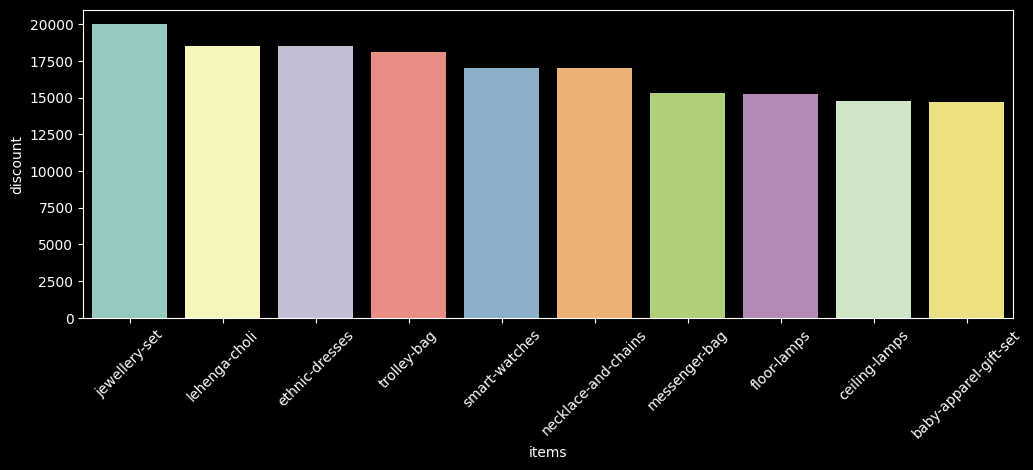

In [20]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
sns.barplot(x='items',y='discount',data=max_discount)
plt.show()

# Top 10 items with highest ratings.

In [25]:
highest_rating = myntra.groupby('items')[['rating','ratingTotal']].max().sort_values(by=['rating','ratingTotal'],ascending=False).reset_index().head(10)
highest_rating

,items,rating,ratingTotal
0,face-moisturisers,5.0,76400
1,tshirts,5.0,75100
2,skin-care-gift-set,5.0,72700
3,sunscreen,5.0,72400
4,makeup-gift-set,5.0,69500
5,lipstick,5.0,65500
6,lip-care,5.0,55300
7,eyeshadow,5.0,52700
8,face-serum-and-gel,5.0,50100
9,mascara,5.0,49100


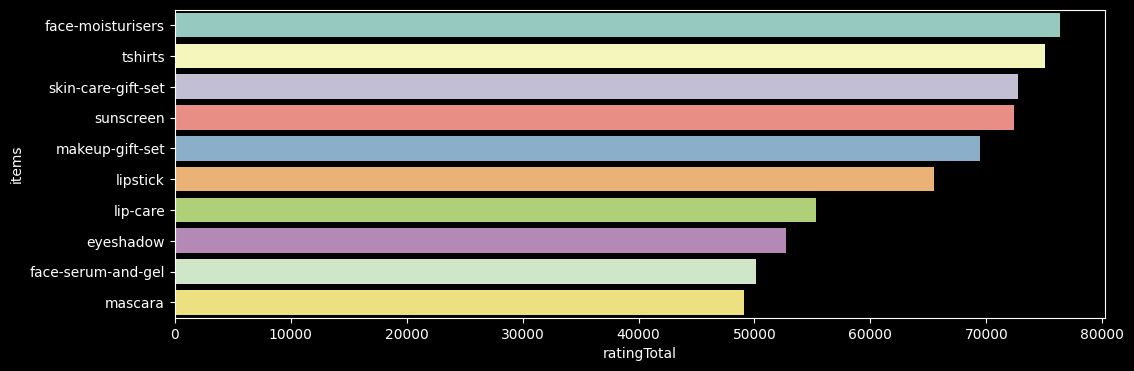

In [28]:
plt.figure(figsize=(12,4))
sns.barplot(data=highest_rating,y='items',x='ratingTotal')
plt.show()

# Profit earned by sellers Top-10.

In [40]:
max_profit = myntra.groupby('seller')['price'].sum().sort_values(ascending=False).reset_index().head(10)
max_profit

,seller,price
0,CANDERE A KALYAN JEWELLERS COMPANY,110498889.0
1,MELORRA,83896966.0
2,JC Collection,15657354.0
3,Puma,14118075.0
4,CARLINGTON,13901605.0
5,Tommy Hilfiger,12083487.0
6,H&M,10220313.0
7,DDecor,9515936.0
8,Marks & Spencer,9035784.0
9,Titan,7863899.0


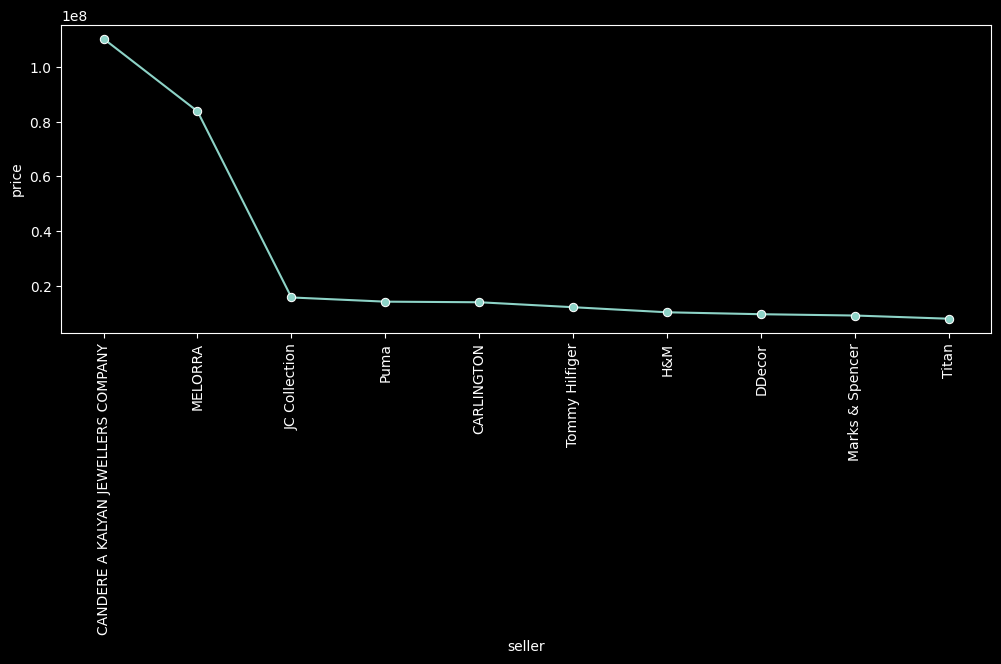

In [44]:
plt.figure(figsize=(12,4))
sns.lineplot(x='seller',y='price',data=max_profit,marker='o')
plt.xticks(rotation=90)
plt.show()

In [38]:
avg_profit = myntra.groupby('seller')['price'].agg(['max','mean']).sort_values(by='mean',ascending=False).reset_index().head(10)
avg_profit

,seller,max,mean
0,Versace,257500.0,51447.459677
1,dyson,45900.0,45900.000000
2,TISSOT,72500.0,45010.638298
3,Rotary,47800.0,36607.352941
4,MISSONI,63900.0,35477.272727
5,Aries Gold,41950.0,34783.333333
6,CIGA Design,41650.0,34637.500000
7,SWISS MILITARY HANOWA,47500.0,33493.739130
8,AVI-8,29950.0,29950.000000
9,D1 Milano,54825.0,28840.000000


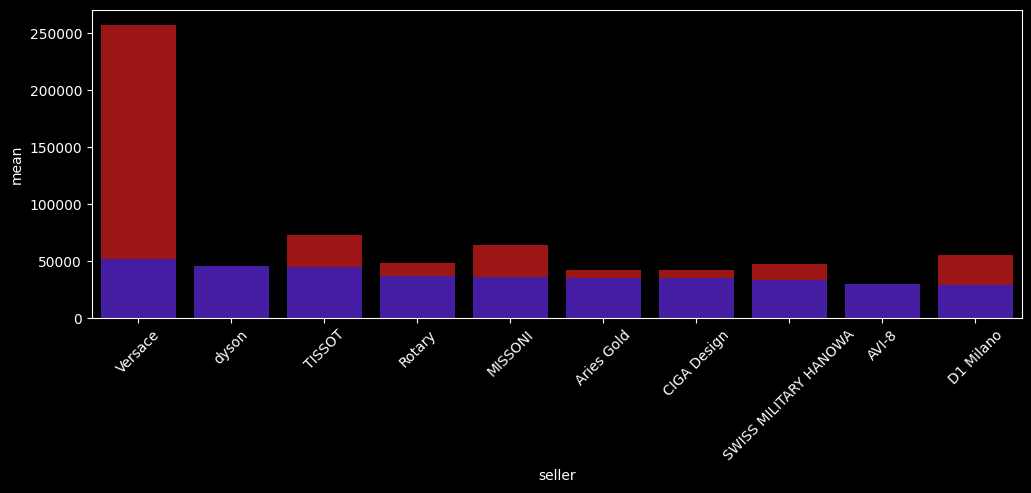

In [63]:
plt.figure(figsize=(12,4))
sns.barplot(x='seller',y='max',color='red',alpha=0.7,data=avg_profit)
sns.barplot(x='seller',y='mean',color='blue',alpha=0.7,data=avg_profit)
plt.xticks(rotation=45)
plt.show()

# Most products sold by any seller top-10.

In [60]:
max_products = myntra['seller'].value_counts().reset_index().head(10)
max_products.columns = ('seller','count')
max_products

,seller,count
0,Roadster,10651
1,H&M,6667
2,Puma,6579
3,max,6486
4,Anouk,6158
5,KALINI,5793
6,JC Collection,5631
7,HRX by Hrithik Roshan,5575
8,Friskers,5240
9,Marks & Spencer,5113


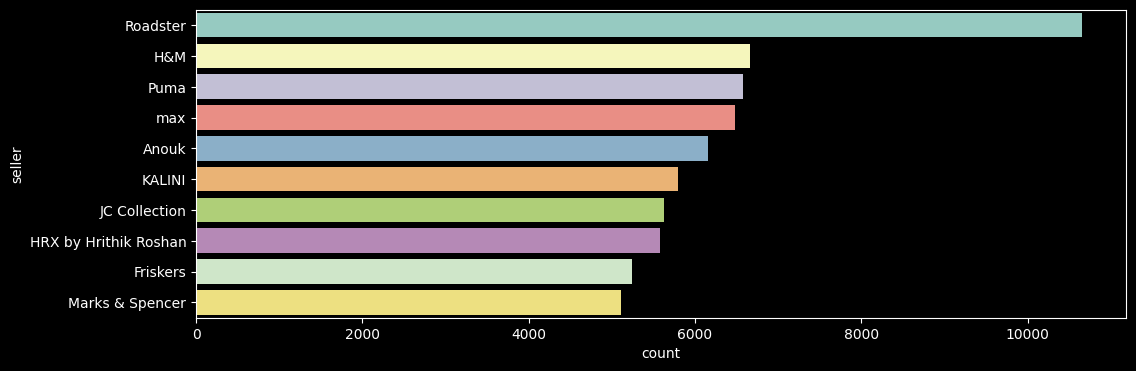

In [61]:
plt.figure(figsize=(12,4))
sns.barplot(y='seller',x='count',data=max_products)
plt.show()

# Most number of items sold Top-10.

In [66]:
most_sold_items = myntra['items'].value_counts().reset_index().head(10)
most_sold_items.columns = ('items','count')
most_sold_items

,items,count
0,tshirts,150918
1,kurta-sets,36405
2,sarees,36285
3,bra,31087
4,earrings,27623
5,kurtas,26671
6,bedsheets,25371
7,jeans,21796
8,watches,21699
9,dresses,20222


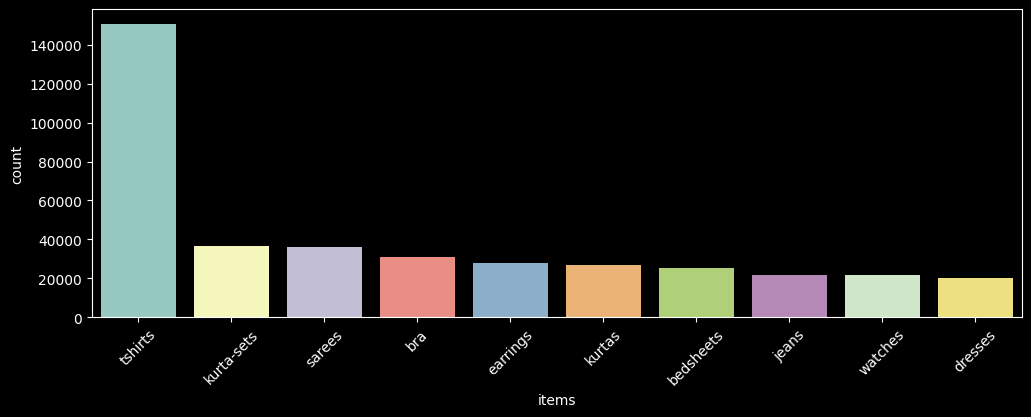

In [67]:
plt.figure(figsize=(12,4))
sns.barplot(x='items',y='count',data=most_sold_items)
plt.xticks(rotation=45)
plt.show()